# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.tree import export_graphviz
#import graphviz

## Part 1: Gradient Descent

### Set Up

In [2]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [3]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


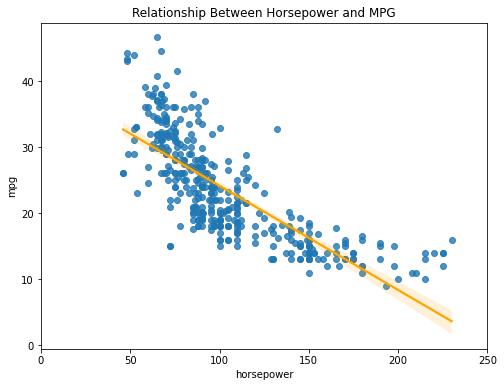

In [4]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

#### Answer: 

- This graph is telling us that there is a sweet spot where the residual sum of squares is at its lowest when slope is at a certain point


- shows the error (RSS) on the y-axis and the slope of the model on the x-axis
- can see that optimal coefficient value is aroung -.158 since that is when RSS is the smallest


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

#### Answer: 

- The step size is how much/big of a step do you make when you are going down the graph i.e. the farther we are from the minimum the bigger steps we want to take and the closer we are the smaller step we want to take. The learning rate is how big of a step do I take depending on where I am on the graph. 


- step size captures the amount to change the coefficients as it tries to minimize the error term 
- learning rate determines how large those steps are


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

#### Answer: 

- The target for a logistic regression is a discrete numeric variable and it is known.
- The predictions that it outputs are classes(classification) so if there are two distinct ouputs of the target it will be predict it to be from either class. 
- It is different from a linear regression model because it is a classification model not a regression model. A regression model like linear regression model needs its target to a continuous numeric variable.
- It is a parametric model



- used for classification problems
- log-odds, which are translated into probabilities 
- linear regression predicts a continuous target, and is not bound between 0 and 1

### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

#### Answer: 

- A benefit of logisitc regression compared to Decision Tree Classifier is that it is not prone to overfitting like the Decision Tree Classifier.
- A reason why we might want use a Decision tree compared to logisitc regression is that it is very helpful when looking at feature importance to the target.


- Benefit: simple to interpret, fits quickly, not prone to overfitting
- Another model might be more useful if the target is imbalanced, or if there are interaction terms in the data

- compared to KNN it will be a lot faster


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [5]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [6]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [7]:
# Train-test split
# Set test_size=0.33 and random_state=42
X = mpg_class.drop('target', axis=1)
y = mpg_class['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

#### Part 1: explore the target column breakdown in train data

In [10]:
# Code to explore
y_train.value_counts(normalize=True)

0    0.744275
1    0.255725
Name: target, dtype: float64

#### Answer:

- There is a class imbalance with the 74% of the training data is 0


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- The model-less baseline would be predicting the majority class i.e. 0


#### Part 3: How accurate would that baseline be on test data?


In [11]:
# Code to find the answer
y_test.value_counts(normalize=True)

0    0.753846
1    0.246154
Name: target, dtype: float64

#### Answer:

- It would be 75% accurate on the test data


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

#### Answer:

- A problem here is the class imbalance there is not enough samples of the target variable 1 for the model to learn from therefore it could misclassify it. 
- Can do oversampling of the minority class using SMOTE and can set a class_weight in the model


- Target is imbalanced
- Oversampling, synthetic oversampling (SMOTE), set `class_weight`
- Note that undersampling doesn't make sense here, since our dataset is so small


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [12]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train )

LogisticRegression(random_state=42)

/Users/juanatavera/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


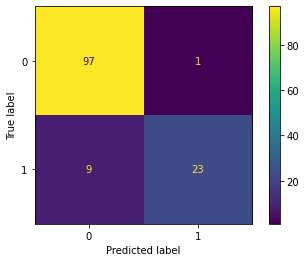

In [13]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(logreg, X_test_scaled, y_test)

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [15]:
# Accuracy
y_pred = logreg.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9230769230769231

In [16]:
# Precision
precision_score(y_test, y_pred)

0.9583333333333334

In [17]:
# Recall
recall_score(y_test, y_pred)

0.71875

In [18]:
# F1-Score
f1_score(y_test, y_pred)

0.8214285714285714

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [20]:
# Calculate roc-auc
roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1])

0.9811862244897959

/Users/juanatavera/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


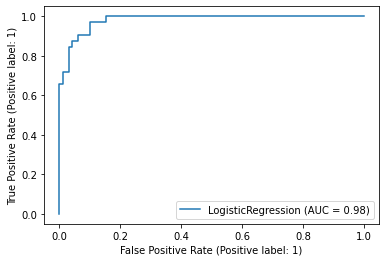

In [19]:
# Plot the ROC curve
plot_roc_curve(logreg, X_test_scaled, y_test);

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

#### Answer:

- Based on the metrics are model is doing pretty well it lacks a little since it has a good amount of false negatives which makes the recall score go down but the AUC score is 0.98 which is good. 


## Part 4: Decision Trees

### Set Up

Let's try a decision tree classifier. 

First, let's just have the tree split once, using just a single column. How would you set that up? Use random_state = 42.

In [22]:
# Create two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state=42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state=42 )

# Train the two trees on different columns

# First fit dt_maxdepth1_v1 on 'weight', set it equal to dt_weight
dt_weight = dt_maxdepth1_v1.fit(X_train[['weight']], y_train)

# Then fit dt_maxdepth1_v2 on 'origin', set it equal to dt_origin
dt_origin = dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

#### Images:

Here we've created two images of what the nodes should look like.

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Just looking at the images, which of these trees does a better job splitting the data? How can you tell?

#### Answer:

- The tree that does a better job ar splitting the data is weight looking at the gini value for the splits at first their the same. Then looking at the splits for the first tree there is less disorder. 


In [24]:
# If you want to check on your answer, let's try out just the default .score() for the models here.
print(dt_weight.score(X_test[['weight']], y_test))

print(dt_origin.score(X_test[['origin']], y_test))

0.9307692307692308
0.7538461538461538


### 13 bonus) What's the default scoring metric for the sklearn DecisionTreeClassifier? Is it always the best metric to use?

#### Answer:

- The default scoring metric is accuracy. No this depends on the business problem - sometimes you want less false negatives or less false positives in your model based on the cost. Therefore for the logistic regression model above maybe we would not want so many false negatives so based on the recall score the model would not be that great since it was 72%

### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [25]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

/Users/juanatavera/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


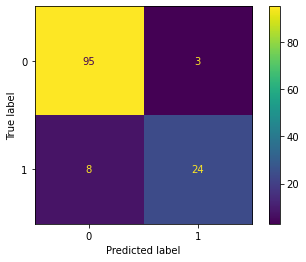

In [26]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt, X_test, y_test)

/Users/juanatavera/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/juanatavera/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


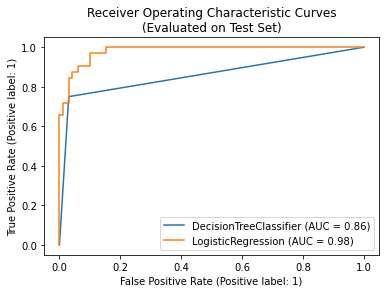

In [27]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

#### Answer:

- The better model according to ROC-AUC curve is the LogisticRegression model because there is a larger AUC score 0.98 compared to the DecisionTreeClassifier 0.86. The closer to 1 the better.
